# Lista 8 de Análise de Dados em Astronomia

Danilo Lessa Bernardienli (8944411)

## Dependências

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

## Exercício 1 

In [164]:
media = 83614 # km/s
sigma = 1897 # km/s
erro = 50 # km/s

v = np.loadtxt("A1758N.dat")
v_esperado = np.random.randn(int(1e6)) * sigma + media

x = np.linspace(np.min(v), np.max(v), int(1e4))
y = st.norm.pdf(x, loc=media, scale=sigma) * len(v_esperado) / 10

## Distribuição dos dados

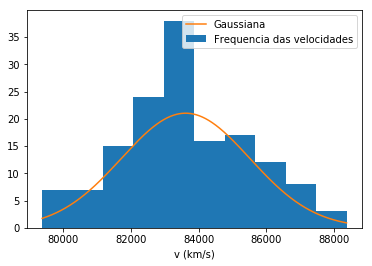

In [259]:
plt.hist(v, bins=10, label="Frequencia das velocidades")
plt.plot(x, y, label="Gaussiana")
plt.xlabel("v (km/s)")
plt.legend()
plt.show()

### Obtenção do $\chi^2$

Nota-se que o Chi2 varia significativamente conforme a quantidade de bins para os dados e o modelo usados.

In [253]:
v = np.loadtxt("A1758N.dat")
def chi2_bin(O, E, bins):
    # Gerar bins para os observados
    Ob = np.histogram(O, bins)[0]
    
    # Gerar bins para os esperados
    Omin = np.min(O)
    Omax = np.max(O)
    # Fazer escala proporcional a razão de observados vs esperados
    Eb = np.histogram(E, bins, range=(Omin, Omax))[0] * np.sum(O) / np.sum(E)
    return np.sum(np.square(Ob - Eb) / Eb)

print("Chi2 para 5 bins: %.2f" % chi2_bin(v, v_esperado, 5))
print("Chi2 para 10 bins: %.2f" % chi2_bin(v, v_esperado, 10))
print("Chi2 para 20 bins: %.2f" % chi2_bin(v, v_esperado, 20))
print("Chi2 para 50 bins: %.2f" % chi2_bin(v, v_esperado, 50))

Chi2 para 5 bins: 1.56
Chi2 para 10 bins: 12.27
Chi2 para 20 bins: 22.53
Chi2 para 50 bins: 67.12


### Teste KS com $\alpha = 0.05$

Nota-se que a estatística D resultante 

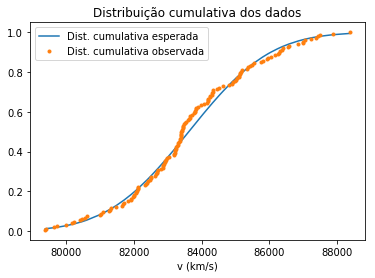

D: -0.071
A hípotese nula é refutada diante dos dados e da significância


In [277]:
v = np.loadtxt("A1758N.dat")
v.sort()
So = (np.arange(len(v)) + 1) / len(v)
Se = st.norm.cdf(v, loc=media, scale=sigma)
plt.title("Distribuição cumulativa dos dados")
plt.plot(v,  Se, '-', label="Dist. cumulativa esperada")
plt.plot(v,  So, '.', label="Dist. cumulativa observada")
plt.xlabel("v (km/s)")
plt.legend()
plt.show()

difS = Se - So
D_ind = np.argmax(np.abs(difS))
D = difS[D_ind]
print("D: %.3f" % D)

# Teste de significância
teste = 1.358 / np.sqrt(len(v)) < D
if teste == False:
    print("A hípotese nula é refutada diante dos dados e da significância")
else:
    print("A hípotese nula não é refutada diante dos dados e da significância")

### Runs

In [463]:
v = np.loadtxt("A1758N.dat")
sinal = np.sign(v - np.mean(v))

r = 1
sign = np.sign(sinal[0])
for i in range(1, len(sinal)):
    if sinal[i] * sign == -1:
        r += 1
        sign *= -1
    
m = len(sinal[sinal > 0])
n = len(sinal[sinal < 0])
N = len(sinal)
ur = 2 * m * n / N + 1
sr = np.sqrt((2 * m * n * (2 * m * n - N)) / (N * N * (N - 1)))
z = np.abs((r - ur) / sr)
p = st.norm.cdf(z) - st.norm.cdf(-z)

print("Runs:\tz=%.2f\tp=%.2f" % (z, p))
if p < 0.05:
    print("Os dados refutam a hípotese nula dentro de p > 0.05")
else:
    print("Os dados não refutam a hípotese nula dentro de p > 0.05")

Runs:	z=1.09	p=0.73
Os dados não refutam a hípotese nula dentro de p > 0.05


## Exercício 2

In [279]:
v1 = np.loadtxt("A1758NE.dat")
v2 = np.loadtxt("A1758NW.dat")

### Comparação da média com teste t em $\alpha = 0.05$

In [424]:
(t, p) = st.ttest_ind(v1, v2)
print("Teste t:\tt=%.3f\tp=%s" % (t, p))
if p < 0.05:
    print("Os dados rejeitam a hípotese nula dentro de p > 0.05")
else:
    print("Os dados não rejeitam a hípotese nula dentro de p > 0.05")

Teste t:	t=-4.764	p=4.55381517487e-06
Os dados rejeitam a hípotese nula dentro de p > 0.05


### Comparação com o teste U em $\alpha = 0.05$

In [425]:
(U, p) = st.mannwhitneyu(v1, v2)
print("Teste U:\tU=%d\tp=%s" % (U, p))
if p < 0.05:
    print("Os dados rejeitam a hípotese nula dentro de p > 0.05")
else:
    print("Os dados não rejeitam a hípotese nula dentro de p > 0.05")

Teste U:	U=1559	p=5.09192110743e-06
Os dados rejeitam a hípotese nula dentro de p > 0.05


### Comparação com o teste F em $\alpha = 0.05$

In [426]:
F = np.var(v1) / np.var(v2)

df1 = len(v1) - 1
df2 = len(v2) - 1
p = st.f.cdf(F, df1, df2)

print("Teste F:\tF=%d\tp=%s" % (F, p))
if p < 0.05:
    print("Os dados rejeitam a hípotese nula dentro de p > 0.05")
else:
    print("Os dados não rejeitam a hípotese nula dentro de p > 0.05")

Teste F:	F=0	p=0.0852870683645
Os dados não rejeitam a hípotese nula dentro de p > 0.05


## Referências

Tabela com valores críticos de D: http://www.mathematik.uni-kl.de/~schwaar/Exercises/Tabellen/table_kolmogorov.pdf